In [3]:
import pandas as pd
import numpy as np
# Assign the filename: file
file = 'titanic.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv('titanic.csv', delimiter=',', names=True, dtype=None)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [4]:

# Assign spreadsheet filename: file
file = pd.ExcelFile('battledeath.xlsx')

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)

['2002', '2004']


In [5]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


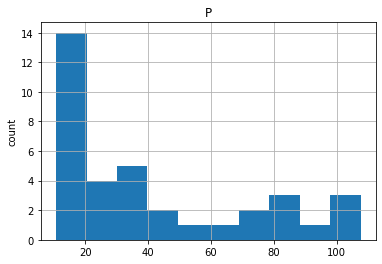

In [9]:
# Import sas7bdat package
import matplotlib.pyplot as plt
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

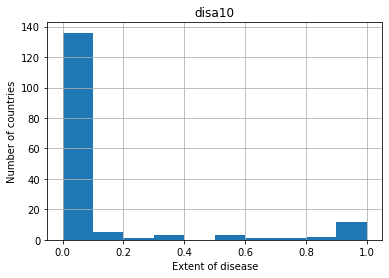

In [10]:
# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()

In [12]:
import h5py

# Assign filename: file
file = 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


In [13]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()


Strain


AttributeError: 'Dataset' object has no attribute 'value'

In [15]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('ja_data2.mat')

# Print the datatype type of mat
print(type(mat))


<class 'dict'>


dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)


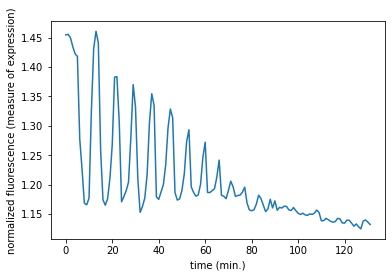

In [16]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()


In [18]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


C:\Users\Juan\AppData\Local\Temp/ipykernel_27128/2902433589.py:8: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  table_names = engine.table_names()


In [19]:
# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute("SELECT * FROM Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs)

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())

   0                                      1  2
0  1  For Those About To Rock We Salute You  1
1  2                      Balls to the Wall  2
2  3                      Restless and Wild  2
3  4                      Let There Be Rock  1
4  5                               Big Ones  3


In [20]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

3
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent


In [21]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE EmployeeId >= 6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   

              HireDate                      Address        City State Country  \
0  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  


In [22]:
# Open engine in context manager
with engine.connect() as con:
    rs = con.execute('SELECT * FROM Employee ORDER BY BirthDAte')
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())


   EmployeeId  LastName FirstName                Title  ReportsTo  \
0           4      Park  Margaret  Sales Support Agent        2.0   
1           2   Edwards     Nancy        Sales Manager        1.0   
2           1     Adams    Andrew      General Manager        NaN   
3           5   Johnson     Steve  Sales Support Agent        2.0   
4           8  Callahan     Laura             IT Staff        6.0   

             BirthDate             HireDate              Address        City  \
0  1947-09-19 00:00:00  2003-05-03 00:00:00     683 10 Street SW     Calgary   
1  1958-12-08 00:00:00  2002-05-01 00:00:00         825 8 Ave SW     Calgary   
2  1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW    Edmonton   
3  1965-03-03 00:00:00  2003-10-17 00:00:00         7727B 41 Ave     Calgary   
4  1968-01-09 00:00:00  2004-03-04 00:00:00          923 7 ST NW  Lethbridge   

  State Country PostalCode              Phone                Fax  \
0    AB  Canada    T2P 5G3  +1 (403)

In [23]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000", engine)

# Print head of DataFrame
print(df.head())

   PlaylistId  TrackId  TrackId              Name  AlbumId  MediaTypeId  \
0           1     3390     3390  One and the Same      271            2   
1           1     3392     3392     Until We Fall      271            2   
2           1     3393     3393     Original Fire      271            2   
3           1     3394     3394       Broken City      271            2   
4           1     3395     3395          Somedays      271            2   

   GenreId Composer  Milliseconds    Bytes  UnitPrice  
0       23     None        217732  3559040       0.99  
1       23     None        230758  3766605       0.99  
2       23     None        218916  3577821       0.99  
3       23     None        228366  3728955       0.99  
4       23     None        213831  3497176       0.99  
